In [6]:
#pip install -U pandas-profiling
# Foi necessário instalar -> pip install ipywidgets

In [7]:
# Instlação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import plotly.express as px

In [8]:
# Fazendo a leitura do dataset com o pandas
df_seguro = pd.read_csv('insurance.csv')

In [17]:
# Configurações necessárias para o Pandas Profile
from pandas_profiling import ProfileReport
profile = ProfileReport(df_seguro, title="Relatório Plano de Saúde", html={'style':{'full_width': True}})
profile.to_notebook_iframe()
profile.to_file(output_file='Relatório Plano de Saúde.html')

ImportError: cannot import name 'ABCIndexClass' from 'pandas.core.dtypes.generic' (c:\Users\edvig\anaconda3\lib\site-packages\pandas\core\dtypes\generic.py)

In [20]:
df_seguro.shape

(1338, 7)

In [ ]:
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
# tipagem dos dados
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [28]:
df_seguro.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


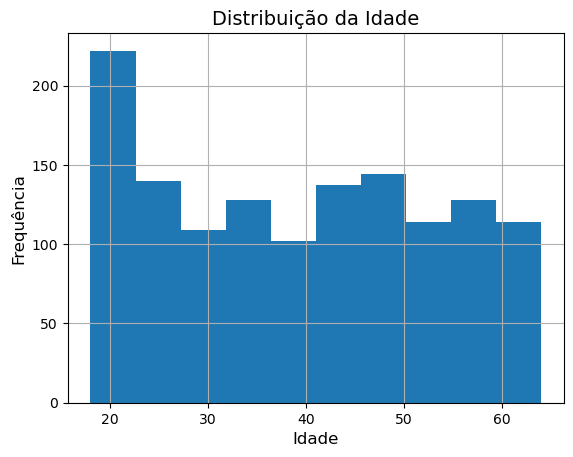

In [56]:
ax_hist = df_seguro['age'].plot(kind = 'hist',
                    grid = 1,
                    legend = None)

ax_hist.set_xlabel("Idade", fontsize = 12, rotation = 0)
ax_hist.set_ylabel("Frequência", fontsize = 12)
ax_hist.set_title("Distribuição da Idade", fontsize = 14, rotation = 0)

ax_hist = ax_hist

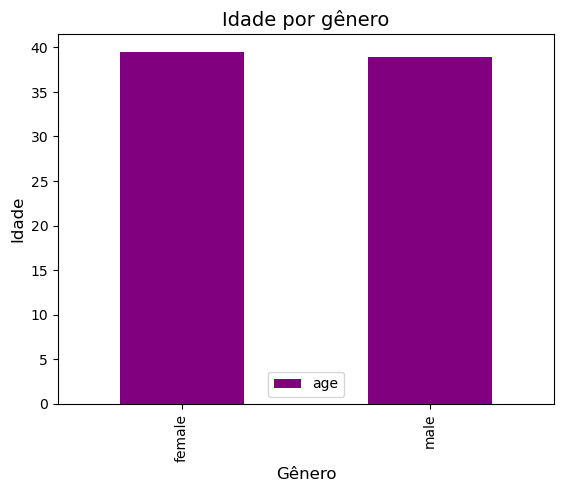

In [76]:
sex_age = df_seguro.pivot_table(index='sex', values='age', aggfunc='mean')
ax_sex_age = sex_age.plot(kind='bar', color='purple')

ax_sex_age.set_xlabel("Gênero", fontsize = 12, rotation = 0)
ax_sex_age.set_ylabel("Idade", fontsize = 12)
ax_sex_age.set_title("Idade por gênero", fontsize = 14, rotation = 0)

ax_sex_age = ax_sex_age

